# Karakteristik Qubit

In [1]:
import numpy as np
from qutip import *
import matplotlib.pyplot as plt
from jc_model import *
%matplotlib inline

In [2]:
wa = 2*np.pi     #frekuensi atom
wc_list = [0.8*wa, 0.95*wa, 1.0*wa]          #frekuensi medan
N = 15
use_rwa = False
g = 0.05*wa
tlist = np.linspace(0,100,301)

# Keadaan awal
#psi_0 = tensor(basis(N,0), basis(2,1)) # keadaan eksitasi
psi_0 = tensor(basis(N,1), basis(2,0)) # keadaan dasar

#oprator
a = tensor(destroy(N), qeye(2))  #operator a
sm = tensor(qeye(N), destroy(2)) #operator sigma-minus

In [3]:
P_e = []
P_g = []
for wc in wc_list:
    H = Hamiltonian(omega_a=wa, omega_m=wc, g=g, n=N, a=a, sm=sm, rwa=use_rwa)
    me_result = mesolve(H, psi_0, tlist, [], [sm.dag()*sm, sm*sm.dag()])
    P_e.append(me_result.expect[0])
    P_g.append(me_result.expect[1])


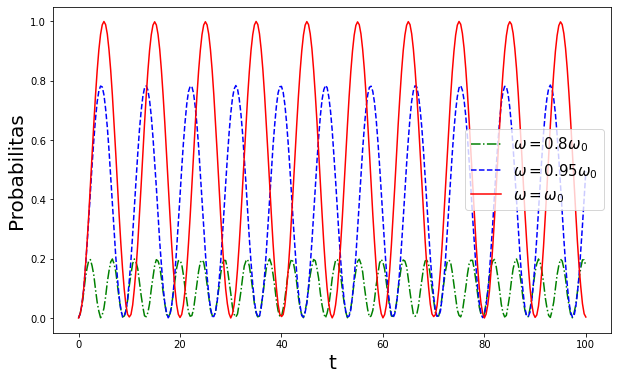

In [4]:
# plot grafik
fig, axes = plt.subplots(1, 1, figsize=(10,6))
axes.plot(tlist, P_e[0],'g-.', label=r"$\omega=0.8\omega_{0}$")
axes.plot(tlist, P_e[1],'b--', label=r"$\omega=0.95\omega_{0}$")
axes.plot(tlist, P_e[2],'r-', label=r"$\omega=\omega_{0}$")
axes.legend(loc=0,  fontsize=15)
axes.set_xlabel('t', fontsize=20)
axes.set_ylabel('Probabilitas', fontsize=20)
plt.savefig('Plot_prob okupasi_karakteristik qubit.pdf')

## Pengaruh Laju Disipasi Medan ($\kappa$)

In [5]:
help(op_collapse)

Help on function op_collapse in module jc_model:

op_collapse(gamma, kappa, a, sm, n_th=0.0)
    Operator kerutuhan (collapse) akan digunakan sebagai parameter pada
    persamaan master.
    
    Parameter
    ---------
    gamma :: float
        Merupakan ungkapan laju disipasi pada atom
    
    kappa :: float
        Merupakan ungkapan laju disipasi pada medan
    
    a :: Qobj
        Operator anihilasi
    
    sm :: Qobj
        Operator sigma_negatif
    
    n_th : 0.0 : float
        Merupakan ungkapan jumlah rata-rata eksitasi thermal bath
    
    Return
    ---------
    Output :: Qobj
        Keluaran berupa ungkapan operator kerutuhan (collapse)



In [6]:
kappa = 0.05

c_ops = op_collapse(gamma=0, kappa=kappa, a=a, sm=sm, n_th=0)
me_result = mesolve(H, psi_0, tlist, c_ops, [sm.dag()*sm, sm*sm.dag()])
P = me_result.expect[0]

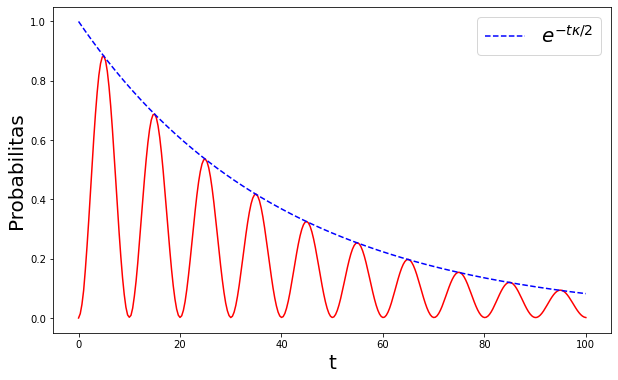

In [7]:
dm = np.exp(-tlist*(kappa/2))

fig, axes = plt.subplots(1, 1, figsize=(10,6))
axes.plot(tlist, P,'r-')
axes.plot(tlist, dm, 'b--', label=r"$e^{-t\kappa/2}$")
axes.legend(loc=0,  fontsize=20)
axes.set_xlabel('t', fontsize=20)
axes.set_ylabel('Probabilitas', fontsize=20)
plt.savefig('Plot_prob okupasi_karakteristik qubit_kappa.pdf')